# Exploratory Data Analysis (EDA)

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [283]:
data = pd.read_csv('StudentsPerformance.csv')
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

## Part 1: Get some basic information about the data

##### (a) What variables are contained in the data?

In [284]:
print(list(data.columns))

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


##### (b) Is there any missing value in the data? If so, please deal with the missing value.

In [285]:
print(data.isnull().values.any())

False


##### (c) Is it necessary to discuss outliers? If so, please discuss, if not, please explain why.

看分布的話應該不用，因為要呈現真實的分布情形。如果算平均可能就需要。

## Part 2: Univariate Analysis

##### (a) Please analyze the composition of students through univariate analysis and plot the data with the pie chart. (Including gender, race/ethnicity, parental level of education, lunch and test preparation course completed or not)

In [286]:
# count values for each univariate
gender_count = data.value_counts(['gender'])
r_and_e_count = data.value_counts(['race/ethnicity'])
par_lev_of_ed_count = data.value_counts(['parental level of education'])
lunch_count = data.value_counts(['lunch'])
test_prep_course_count = data.value_counts(['test preparation course'])

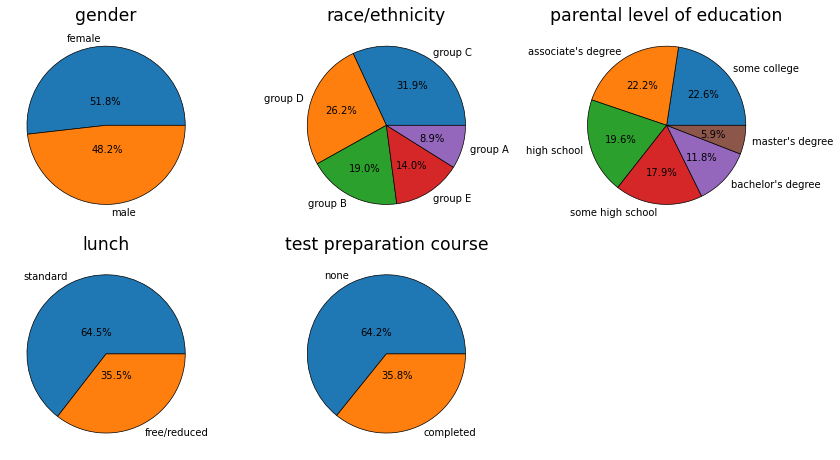

In [287]:
wedgeprops = {'linewidth': 0.7, 'edgecolor':'k'}

fig, ax = plt.subplots(2, 3, figsize=(12, 6.5))
ax[-1, -1].axis('off')

ax[0, 0].set_title('gender', fontsize='xx-large')
ax[0, 0].pie(gender_count, 
             labels=list(x[0] for x in gender_count.index), 
             autopct='%1.1f%%', 
             pctdistance=0.3, 
             wedgeprops=wedgeprops
            )

ax[0, 1].set_title('race/ethnicity', fontsize='xx-large')
ax[0, 1].pie(r_and_e_count, 
             labels=list(x[0] for x in r_and_e_count.index), 
             autopct='%1.1f%%', 
             wedgeprops=wedgeprops
            )

ax[0, 2].set_title('parental level of education', fontsize='xx-large')
ax[0, 2].pie(par_lev_of_ed_count, 
             labels=list(x[0] for x in par_lev_of_ed_count.index), 
             autopct='%1.1f%%', 
             wedgeprops=wedgeprops
            )

ax[1, 0].set_title('lunch', fontsize='xx-large')
ax[1, 0].pie(lunch_count, 
             labels=list(x[0] for x in lunch_count.index), 
             autopct='%1.1f%%', 
             pctdistance=0.3, 
             wedgeprops=wedgeprops
            )

ax[1, 1].set_title('test preparation course', fontsize='xx-large')
ax[1, 1].pie(test_prep_course_count, 
             labels=list(x[0] for x in test_prep_course_count.index), 
             autopct='%1.1f%%',
             pctdistance=0.3, 
             wedgeprops=wedgeprops
            )

plt.tight_layout()
plt.show()

##### (b) Please analyze the score distribution through univariate analysis and plot the data with the histogram. (Including math, reading, writing score and the average score)

In [288]:
math_score = data['math score']
reading_score = data['reading score']
writing_score = data['writing score']
avg_score = (math_score+reading_score+writing_score) / 3
print(avg_score)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64


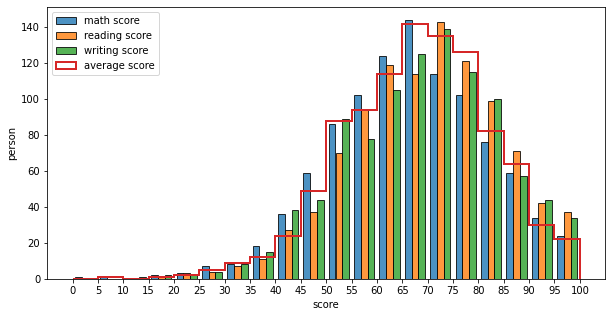

In [289]:
plt.figure(figsize=(10, 5))
plt.hist([math_score, reading_score, writing_score], 
         label=['math score', 'reading score', 'writing score'], 
         bins=20, 
         histtype='bar',
         edgecolor='k', 
         range=(0, 100), 
         alpha=0.8
        )
plt.hist(avg_score, 
         label='average score', 
         bins=20, 
         histtype='step', 
         linewidth=2, 
         range=(0, 100)
        )
plt.xticks(np.arange(0, 101, 5))
plt.xlabel('score')
plt.ylabel('person')
plt.legend(loc='upper left')
plt.show()

## Part 3: Please analyze the data through multivariate analysis

##### (a) Discuss the impact of each variable on average score and analyze its correlation.

In [290]:
# make a new dataframe with a column added holding the average score
data_avg = data.assign(avg_score=avg_score)
avg_score = data_avg.avg_score

# gender
male_avg_scr = avg_score[data_avg.gender=='male']
female_avg_scr = avg_score[data_avg.gender=='female']
gndr_avg_scr = [male_avg_scr, female_avg_scr]
gndr_avg_avg_scr = [np.around(np.average(male_avg_scr.values), 2), 
                    np.around(np.average(female_avg_scr.values), 2)]

# race/ethnicity
groupA_avg_scr = avg_score[data_avg['race/ethnicity']=='group A']
groupB_avg_scr = avg_score[data_avg['race/ethnicity']=='group B']
groupC_avg_scr = avg_score[data_avg['race/ethnicity']=='group C']
groupD_avg_scr = avg_score[data_avg['race/ethnicity']=='group D']
groupE_avg_scr = avg_score[data_avg['race/ethnicity']=='group E']
rne_avg_scr = [groupA_avg_scr, groupB_avg_scr, groupC_avg_scr, 
               groupD_avg_scr, groupE_avg_scr]
rne_avg_avg_scr = [np.around(np.average(groupA_avg_scr.values), 2),
                   np.around(np.average(groupB_avg_scr.values), 2),
                   np.around(np.average(groupC_avg_scr.values), 2),
                   np.around(np.average(groupD_avg_scr.values), 2),
                   np.around(np.average(groupE_avg_scr.values), 2)]

# parental level of education
shs_avg_scr = avg_score[data_avg['parental level of education']=='some high school']
hs_avg_scr = avg_score[data_avg['parental level of education']=='high school']
sc_avg_scr = avg_score[data_avg['parental level of education']=='some college']
ad_avg_scr = avg_score[data_avg['parental level of education']=="associate's degree" ]
bd_avg_scr = avg_score[data_avg['parental level of education']=="bachelor's degree"]
md_avg_scr = avg_score[data_avg['parental level of education']=="master's degree"]
ploe_avg_scr = [shs_avg_scr, hs_avg_scr, sc_avg_scr, 
                ad_avg_scr, bd_avg_scr, md_avg_scr]
ploe_avg_avg_scr = [np.around(np.average(shs_avg_scr.values), 2), 
                    np.around(np.average(hs_avg_scr.values), 2),
                    np.around(np.average(sc_avg_scr.values), 2),
                    np.around(np.average(ad_avg_scr.values), 2),
                    np.around(np.average(bd_avg_scr.values), 2),
                    np.around(np.average(md_avg_scr.values), 2)]

# lunch
std_avg_scr = avg_score[data_avg.lunch=='standard'] 
fr_avg_scr = avg_score[data_avg.lunch=='free/reduced']
lunch_avg_scr = [std_avg_scr, fr_avg_scr]
lunch_avg_avg_scr = [np.around(np.average(std_avg_scr.values), 2),
                     np.around(np.average(fr_avg_scr.values), 2)]

# test preparation course
compltd_avg_scr = avg_score[data_avg['test preparation course']=='completed']
umcompltd_avg_scr = avg_score[data_avg['test preparation course']=='none']
tpc_avg_scr = [compltd_avg_scr, umcompltd_avg_scr]
tpc_avg_avg_scr = [np.around(np.average(compltd_avg_scr.values), 2),
                   np.around(np.average(umcompltd_avg_scr.values), 2)]

###### Impact of Gender on the Average Score

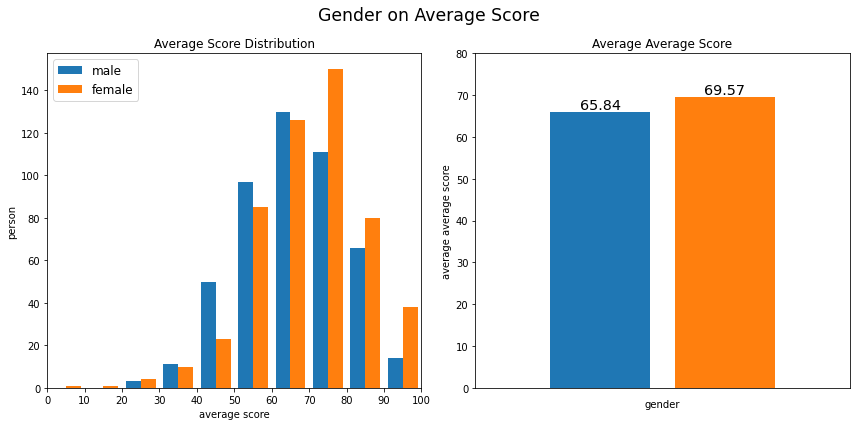

In [291]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# histogram
ax1.hist(gndr_avg_scr, 
              label=['male', 'female'], 
              bins=10, 
              range=(0, 100))
ax1.set(xticks=np.arange(0, 101, 10), 
             xlim=(0, 100),
             title='Average Score Distribution', 
             xlabel='average score', 
             ylabel='person')
ax1.legend(loc='upper left', fontsize='large')

# bar chart
gndr_bar = ax2.bar(x=[0, 1], 
                        height=gndr_avg_avg_scr, 
                        width=0.8, 
                        color=['#1f77b4', '#ff7f0e'],
                        tick_label=[''])
ax2.set(title='Average Average Score',
        xlim=(-1, 2), 
        ylim=(0, 80),
        xlabel='gender', 
        ylabel='average average score')
ax2.bar_label(gndr_bar, labels=gndr_avg_avg_scr, 
              label_type='edge', fontsize='x-large')
ax2.tick_params(bottom=False)

fig.suptitle('Gender on Average Score', fontsize='xx-large')
plt.tight_layout()
plt.show()

Female's average average score is slightly higher than that of male's.

###### Impact of Race and Ethnicity on Average Score

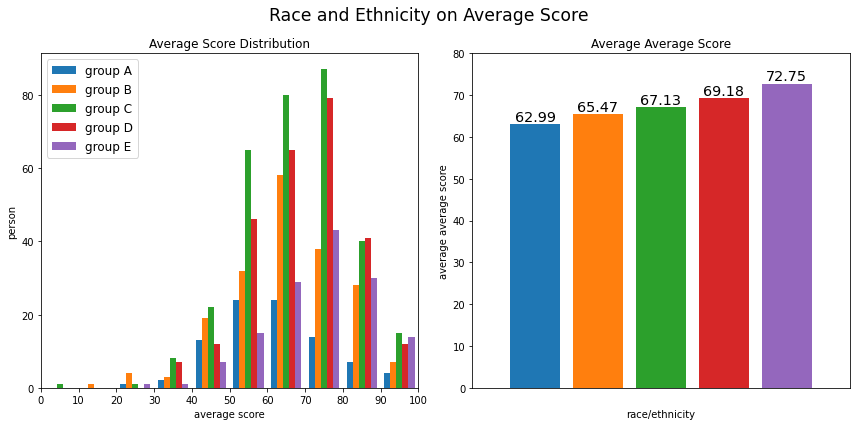

In [292]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# histogram
ax1.hist(rne_avg_scr, 
         label=['group A', 'group B', 'group C', 'group D', 'group E'], 
         bins=10, 
         range=(0, 100))
ax1.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100),
        title='Average Score Distribution', 
        xlabel='average score', 
        ylabel='person')
ax1.legend(loc='upper left', fontsize='large')

# bar chart
rne_bar=ax2.bar(x=np.arange(5), 
                height=rne_avg_avg_scr, 
                width=0.8, 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], 
                tick_label=[' '])
ax2.set(title='Average Average Score',
        xlim=(-1, 5), 
        ylim=(0, 80),
        xlabel='race/ethnicity', 
        ylabel='average average score')
ax2.bar_label(rne_bar, labels=rne_avg_avg_scr, 
              label_type='edge', fontsize='x-large')
ax2.tick_params(bottom=False)

fig.suptitle('Race and Ethnicity on Average Score', fontsize='xx-large')
plt.tight_layout()
plt.show()

The bar chart shows that group E has the highest average average score, followed by group D, followed by group C, followed by group B, and finally group A has the lowest. Group A has the least population and the lowest average average score, while group E has the second least population and yet the highest average average score. The population of each group seems not to have much impact on their score performances.

###### Impact of Parental Level of Education on Average Score 

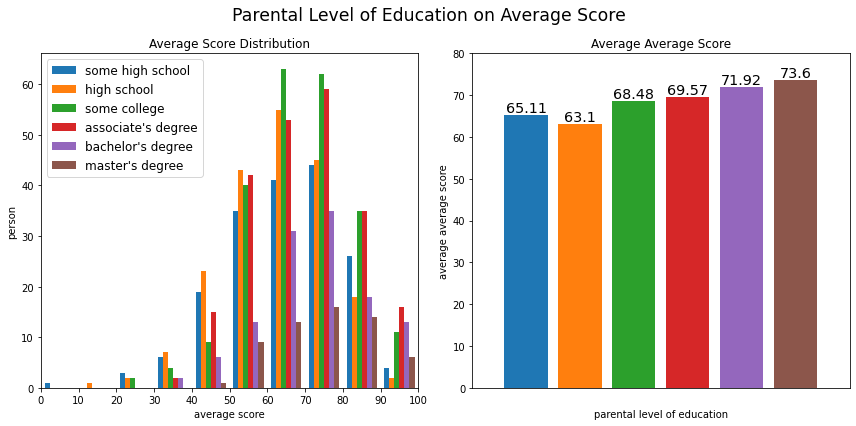

In [293]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# histogram
ax1.hist(ploe_avg_scr, 
         label=["some high school", "high school", "some college", 
                 "associate's degree", "bachelor's degree", "master's degree"], 
         bins=10, 
         range=(0, 100))
ax1.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100), 
        title='Average Score Distribution', 
        xlabel='average score', 
        ylabel='person')
ax1.legend(loc='upper left', fontsize='large')

# bar chart
ploe_bar=ax2.bar(x=np.arange(6), 
                 height=ploe_avg_avg_scr, 
                 width=0.8, 
                 color=['#1f77b4', '#ff7f0e', '#2ca02c', 
                         '#d62728', '#9467bd', '#8c564b'], 
                 tick_label=[" "])
ax2.set(title='Average Average Score',
        xlim=(-1, 6), 
        ylim=(0, 80),
        xlabel='parental level of education', 
        ylabel='average average score')
ax2.bar_label(ploe_bar, labels=ploe_avg_avg_scr, 
              label_type='edge', fontsize='x-large')
ax2.tick_params(bottom=False)

fig.suptitle('Parental Level of Education on Average Score', fontsize='xx-large')
plt.tight_layout()
plt.show()

The correlation between parental level of education and score is generally positive, with an exception that "some high school" is doing slightly better than "high school".

###### Impact of Lunch on Average Score

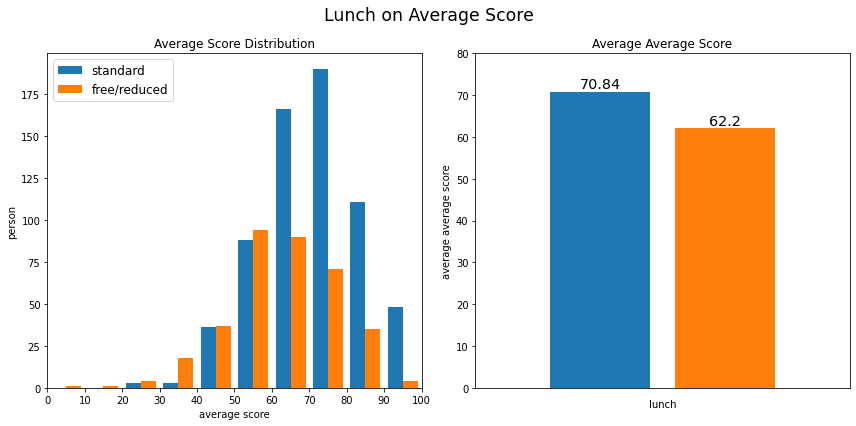

In [294]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# histogram
ax1.hist(lunch_avg_scr, 
         label=['standard', 'free/reduced'], 
         bins=10, 
         range=(0, 100))
ax1.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100), 
        title='Average Score Distribution', 
        xlabel='average score', 
        ylabel='person')
ax1.legend(loc='upper left', fontsize='large')

# bar chart
lunch_bar=ax2.bar(x=[0, 1], 
                  height=lunch_avg_avg_scr, 
                  width=0.8, 
                  color=['#1f77b4', '#ff7f0e'],
                  tick_label=[''])
ax2.set(title='Average Average Score',
        xlim=(-1, 2), 
        ylim=(0, 80),
        xlabel='lunch', 
        ylabel='average average score')
ax2.bar_label(lunch_bar, labels=lunch_avg_avg_scr, 
              label_type='edge', fontsize='x-large')
ax2.tick_params(bottom=False)

fig.suptitle('Lunch on Average Score', fontsize='xx-large')
plt.tight_layout()
plt.show()

Lunch seems to have a great impact on test performances. The average average score gap between students who have standard lunch and students who have free/reduced lunch is 8.64, with the standard lunch ones leading. One possible explanation is that students having free/reduced lunch are coming from more financially disadvantaged families, which leads to less studying resources and lower grades.

###### Impact of Test Preparation Course on Average Score

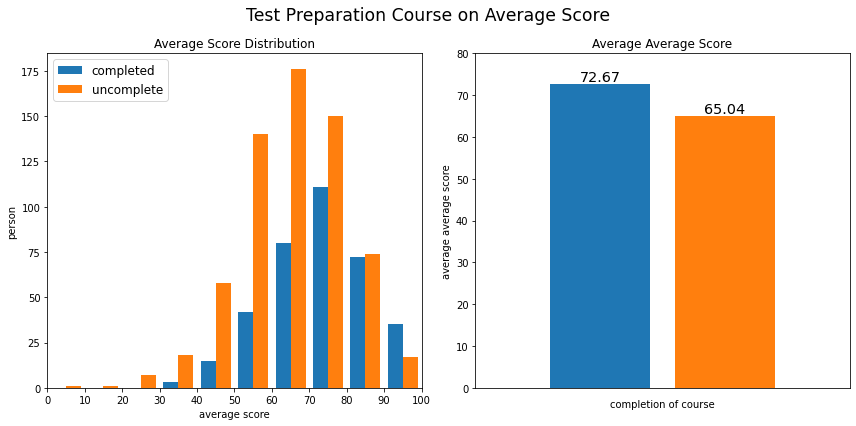

In [295]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# histogram
ax1.hist(tpc_avg_scr, 
         label=['completed', 'uncomplete'], 
         bins=10, 
         range=(0, 100))
ax1.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100), 
        title='Average Score Distribution', 
        xlabel='average score', 
        ylabel='person')
ax1.legend(loc='upper left', fontsize='large')

# bar chart
tpc_bar = ax2.bar(x=[0, 1], 
                  height=tpc_avg_avg_scr, 
                  width=0.8, 
                  color=['#1f77b4', '#ff7f0e'],
                  tick_label=[''])
ax2.set(title='Average Average Score',
        xlim=(-1, 2), 
        ylim=(0, 80),
        xlabel='completion of course', 
        ylabel='average average score')
ax2.bar_label(tpc_bar, labels=tpc_avg_avg_scr, 
              label_type='edge', fontsize='x-large')
ax2.tick_params(bottom=False)


fig.suptitle('Test Preparation Course on Average Score', fontsize='xx-large')
plt.tight_layout()
plt.show()

Those who had completed the course have done significantly better on the test, leading those who had not completed the course by 7.63 in the average average score.

#### (b) Select at least two variables to analyze the relationship between them and the average score. (For example, compare the scores of male and female who have (un)completed the preparation course.)

###### Lunch Choice Ｘ Course Completion

In [296]:
# standard lunch and completed the course
snc_avg = avg_score[data_avg.lunch=='standard'][data_avg['test preparation course']=='completed']
snc_avg_avg = np.around(np.average(snc_avg.values), 2)

# standard lunch and uncompleted the couse
snu_avg = avg_score[data_avg.lunch=='standard'][data_avg['test preparation course']=='none']
snu_avg_avg = np.around(np.average(snu_avg.values), 2)

# free/reduced lunch and completed the course
fnc_avg = avg_score[data_avg.lunch=='free/reduced'][data_avg['test preparation course']=='completed']
fnc_avg_avg = np.around(np.average(fnc_avg.values), 2)

# free/reduced lunch and uncompleted the course
fnu_avg = avg_score[data_avg.lunch=='free/reduced'][data_avg['test preparation course']=='none']
fnu_avg_avg = np.around(np.average(fnu_avg.values), 2)

avgs = [snc_avg_avg, snu_avg_avg, fnc_avg_avg, fnu_avg_avg]

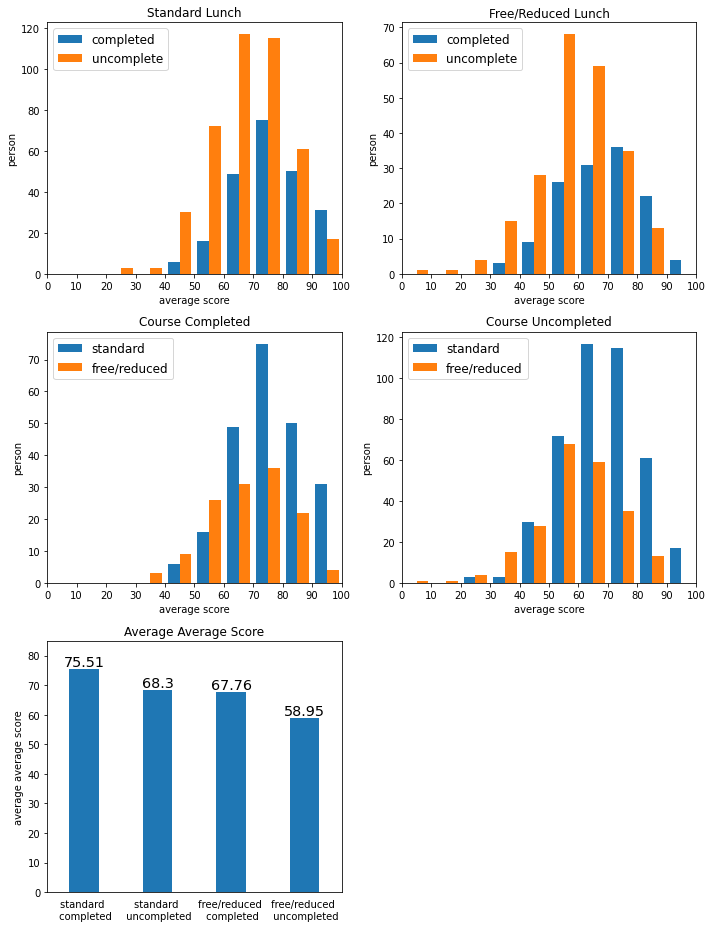

In [299]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 13))
ax6.axis('off')

ax1.hist([snc_avg, snu_avg],
         label=['completed', 'uncomplete'], 
         bins=10, 
         range=(0, 100))
ax1.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100), 
        title='Standard Lunch', 
        xlabel='average score', 
        ylabel='person')
ax1.legend(loc='upper left', fontsize='large')

ax2.hist([fnc_avg, fnu_avg], 
         label=['completed', 'uncomplete'], 
         bins=10, 
         range=(0, 100))
ax2.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100), 
        title='Free/Reduced Lunch', 
        xlabel='average score', 
        ylabel='person')
ax2.legend(loc='upper left', fontsize='large')

ax3.hist([snc_avg, fnc_avg], 
         label=['standard', 'free/reduced'], 
         bins=10, 
         range=(0, 100))
ax3.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100), 
        title='Course Completed', 
        xlabel='average score', 
        ylabel='person')
ax3.legend(loc='upper left', fontsize='large')

ax4.hist([snu_avg, fnu_avg], 
         label=['standard', 'free/reduced'], 
         bins=10, 
         range=(0, 100))
ax4.set(xticks=np.arange(0, 101, 10), 
        xlim=(0, 100), 
        title='Course Uncompleted', 
        xlabel='average score', 
        ylabel='person')
ax4.legend(loc='upper left', fontsize='large')

bars = ax5.bar(x = range(0, 7, 2), 
               height=avgs, 
               tick_label=['standard \n completed',
                           'standard \n uncompleted',
                           'free/reduced \n completed',
                           'free/reduced \n uncompleted'
                          ]
              )
ax5.set(title='Average Average Score',
        xlim=(-1, 7), 
        ylim=(0, 85),  
        ylabel='average average score')
ax5.bar_label(bars, labels=avgs, 
              label_type='edge', fontsize='x-large')
ax5.tick_params(bottom=False)

plt.tight_layout()
plt.show()

Students that have standard lunches are performing better on the average average score than the students that have free/reduced lunches, regardless if they have completed the test preparation course or not. But the course did help students get higher scores in general.